<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.221'/>

### Modulo Request

In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
p12.status_code

200

In [5]:
# print(p12.text)

In [6]:
#p12.content
# b'<contenido>' nos indica que el contenido son bites planos

In [7]:
#p12.headers

In [8]:
p12.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
p12.request.method

'GET'

In [10]:
p12.request.url

'https://www.pagina12.com.ar/'

### Modulo BeautifulSoup



In [12]:
from bs4 import BeautifulSoup

In [13]:
# pasamos como argumento el request.text,y un parser segun documentacion
s = BeautifulSoup(p12.text, 'html.parser')

In [13]:
type(s)

bs4.BeautifulSoup

In [8]:
#print(s.prettify())

In [9]:
# find permite buscar etiquetas html, y tambien atributos(clases)#
#s.find('ul', attrs={'class':'hot-sections'}).find_all('li')

#### Extrayendo información

In [14]:
# obtenemos  todos los list-items
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [17]:
#seccion = secciones[0]
#seccion

<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>

In [18]:
#seccion.a.get_text()

'El país'

In [19]:
#seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [15]:
# obtener urls con list comprehension
links_secciones = [seccion.a.get('href') for seccion in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa']

#### Haciendo request la primer seccion

In [21]:
sec = requests.get(links_secciones[0])

In [22]:
sec.request.url

'https://www.pagina12.com.ar/secciones/el-pais'

In [23]:
sec.status_code

200

##### Parseamos el documento

In [24]:
s_section = BeautifulSoup(sec.text, 'html.parser')

In [25]:
print(s_section.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

### obtenemos el primer articulo promocionado

In [26]:
featured_article = s_section.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/274272-marcha-por-vicentin-beatriz-sarlo-no-dejo-contenta-a-debora-">Cuando la invitada no respeta el guión</a></span><h2><a href="https://www.pagina12.com.ar/274272-marcha-por-vicentin-beatriz-sarlo-no-dejo-contenta-a-debora-">Marcha por Vicentin: Beatriz Sarlo no dejó contenta a Débora Plager con su análisis</a></h2><a href="https://www.pagina12.com.ar/274272-marcha-por-vicentin-beatriz-sarlo-no-dejo-contenta-a-debora-"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">24 de junio de 2020</span></div></div>

In [27]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/274272-marcha-por-vicentin-beatriz-sarlo-no-dejo-contenta-a-debora-'

In [28]:
featured_article.text

'Cuando la invitada no respeta el guiónMarcha por Vicentin: Beatriz Sarlo no dejó contenta a Débora Plager con su análisis24 de junio de 2020'

In [29]:
article_list = s_section.find('ul', attrs={'class': 'article-list'})

In [30]:
article_list.text

'Espionaje ilegal: piden crear una comisión investigadora en la Legislatura porteña|Apuntan a Rodríguez Larreta, su jefe de Gabinete Felipe Miguel y el de la Policía de la Ciudad, Gabriel Berard24 de junio de 2020|Por Werner PertotLa primera batalla parlamentaria por Vicentin|El Senado debatirá la creación de una comisión investigadora24 de junio de 2020|Por Miguel JorqueraCoronavirus: Luis Muiña, el primer genocida contagiado\xa0|En 2017 recibió el beneficio del 2x1 de la Corte Suprema, pero no alcanzó a gozarlo por el repudio social24 de junio de 2020|Por Ailín BullentiniCononavirus: Máximo Kirchner presentó un proyecto para incentivar la donación de plasma|La iniciativa cuenta con el apoyo del PRO24 de junio de 2020Coronavirus: ingresaron los primeros pacientes a los Hospitales Modulares\xa0de Hurlingham y Almirante Brown|Se trata de 10 personas\xa0\xa024 de junio de 2020El sucesor de Jaime Stiuso\xa0señaló a Gustavo Arribas como responsable del espionaje ilegal|Diego Dalmau Pereyra

#### reto: armar  una funcion que reciba un objeto bs4 de una pagina de una funcion, y devuelva una lista con todos los links a las notas de esa seccion, incluyendo el articulo promocionado y todas las listas que aparecen debajo

In [31]:
# Solucion

def obtener_notas(soup):
    '''
    Funcion que recibe un objeto de BeautifulSoup de una pagina 
    de una seccion y devuelve una lista de urls a lasnotas de esa seccion.
    '''
    lista_notas = []
    
    # Obtengo el articulo promocionado
    featured_article = soup.find('div', attrs={'class':'featured-article__container'})
    if featured_article:
        lista_notas.append(featured_article.a.get('href'))
        
    # Obtengo el listado de los articulos
    article_list = soup.find('ul', attrs={'class': 'article-list'})
    
    for article in article_list.find_all('li'):
        
        if article.a:
            lista_notas.append(article.a.get('href'))
            
    return list(set(lista_notas))

In [32]:
lista_notas = obtener_notas(s_section)
lista_notas

['https://www.pagina12.com.ar/274098-espionaje-ilegal-allanaron-la-casa-del-sucesor-de-jaime-stiu',
 'https://www.pagina12.com.ar/274104-hebe-de-bonafini-los-panuelos-fueron-atacados-por-los-sirvie',
 'https://www.pagina12.com.ar/274064-coronavirus-luis-muina-el-primer-genocida-contagiado',
 'https://www.pagina12.com.ar/274229-el-sucesor-de-jaime-stiuso-senalo-a-gustavo-arribas-como-res',
 'https://www.pagina12.com.ar/274106-cornejo-contra-larreta-esta-en-la-nube-del-relato-del-gobier',
 'https://www.pagina12.com.ar/274235-cuarentena-mas-estricta-por-15-dias-no-habra-colectivos-entr',
 'https://www.pagina12.com.ar/274204-la-primera-batalla-parlamentaria-por-vicentin',
 'https://www.pagina12.com.ar/274099-un-camarista-aporto-nuevos-detalles-de-los-aprietes-del-macr',
 'https://www.pagina12.com.ar/274228-manuel-belgrano-y-la-justicia',
 'https://www.pagina12.com.ar/274077-gines-gonzalez-garcia-podemos-estar-complicadisimos-si-el-av',
 'https://www.pagina12.com.ar/274076-coronavirus-ingre

### Manejo de errores

In [36]:
# La forma mas simple status code 200
r = requests.get(url)

In [41]:
if r.status_code == 200:
    # procesamos la respuesta
    print(r.status_code)
else:
    # Informamos el error
    print(r.status_code)

200


In [43]:
url_mala = url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [54]:
try:
    requests.get(url_mala)
except Exception as e :
    print('error en la request')
    print(e)
    print('\n')

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7ff5f5dad820>: Failed to establish a new connection: [Errno -2] Name or service not known'))




In [56]:
featured_article.b.get('href')

AttributeError: 'NoneType' object has no attribute 'get'

In [57]:
try:
    featured_article.b.get('href')
except:
    pass
print('continua el codigo')

continua el codigo


### Descargando Contenido

In [60]:
url_nota = lista_notas[0]
url_nota

'https://www.pagina12.com.ar/274098-espionaje-ilegal-allanaron-la-casa-del-sucesor-de-jaime-stiu'

In [73]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'html.parser')
        
        # Extraemos el titulo
        titulo = s_nota.find('h1', attrs={'class': 'article-title'})
        #print(titulo.text)
        
        # Extraemos la fecha
        fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
        #print(fecha)
        
        # Extraer copete
        copete = s_nota.find('div', attrs = {'class':'article-summary'})
        #print(copete.text) 
        
        # Extraer la volanda
        volanta = s_nota.find('h2', attrs = {'class':'article-prefix'})
        #print(volanta.text)
        
        # Extraer cuerpo
        cuerpo = s_nota.find('div', attrs = {'class':'article-text'})
        #print(cuerpo.text)
        
        # Extraer autor
        autor = s_nota.find('div', attrs = {'class':'article-author'})
        #print(autor.text)
            
        
except Exception as e :
    print('error en la request')
    print(e)
    print('\n')
    


2020-06-24


#### reto clase, extraer copete, volanda, cuerpo, autor

### Descargar Contenido Multimedia

In [98]:
media = s_nota.find('div', attrs = {'class':'article-main-media'})
media.find_all('img')

[<img alt="Un hombre clave en la estructura de la Agencia Federal de Inteligencia quedó más complicado en la causa por espionaje ilegal macrista. " class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/83092/sof-c3-ada.jpeg?itok=XmxB8UiV" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Un hombre clave en la estructura de la Agencia Federal de Inteligencia quedó más complicado en la causa por espionaje ilegal macrista. " class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/83092/sof-c3-ada.jpeg?itok=EJ7gD1Yh" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img alt="Un hombre clave en la estructura de la Agencia Federal de Inteligencia quedó más complicado en la causa por espionaje ilegal macrista. " class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles

In [99]:
imagenes = imagenes = media.find_all('img')

In [100]:
if len(imagenes) == 0:
    print('no se encontraron imagenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/83092/sof-c3-ada.jpeg?itok=EJ7gD1Yh


In [101]:
img_req = requests.get(img_src)

In [102]:
img_req.status_code

200

In [103]:
from IPython.display import Image

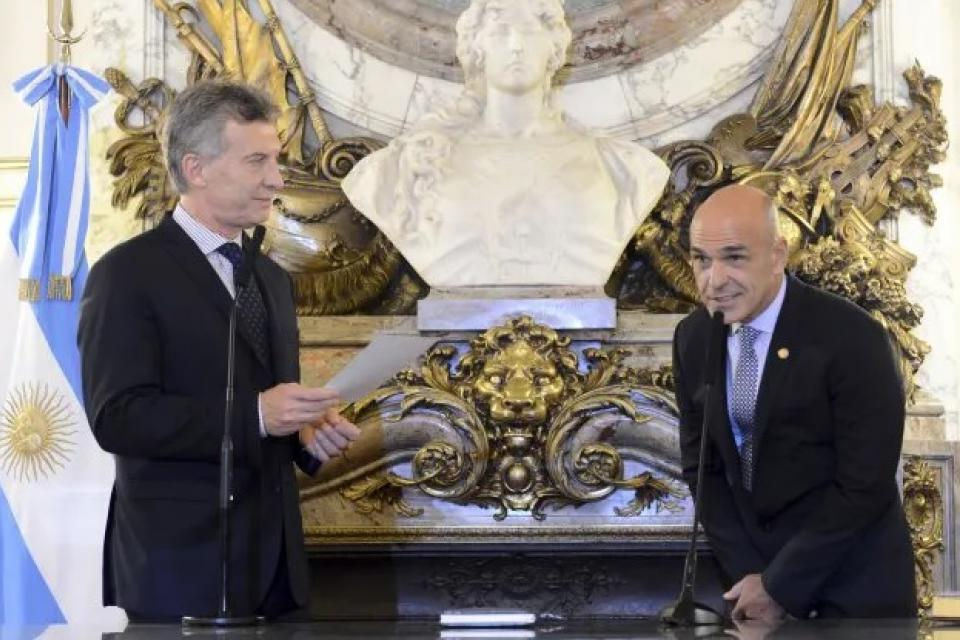

In [91]:
Image(img_req.content)

### Solucion reto

In [1]:
def obtener_info(s_nota):
    # Creamos un diccionario vacio para probarlo con la informacion
    ret_dict = {}
    
    # Extraemos la fecha
    fecha = s_nota.find('span', attrs={'pubdate': 'pubdate'})
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime')
    else:
        ret_dict['fecha'] = None
        
        
    # Extraemos el titulo
    titulo = s_nota.find('h1', attrs={'class': 'article-title'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None

    # Extraer la volanda
    volanta = s_nota.find('h2', attrs = {'class':'article-prefix'})
    if volanta:
        ret_dict['volanta'] = volanta.get_text()
    else:
        ret_dict['volanta'] = None

        
    # Extraer copete
    copete = s_nota.find('div', attrs = {'class':'article-summary'})
    if copete:
        ret_dict['copete'] = copete.get_text()
    else:
        ret_dict['copete'] = None

    # Extraer autor
    autor = s_nota.find('div', attrs = {'class':'article-author'})
    if autor:
        ret_dict['autor'] = autor.get_text()
    else:
        ret_dict['autor'] = None

    # Extraer imagen    
    media = s_nota.find('div', attrs = {'class':'article-main-media'})
    if media:
        imagenes = media.find_all('img')
        if len(imagenes) == 0:
            print('no se encontraron imagenes')
        else:
            imagen = imagenes[-1]
            img_src = imagen.get('data-src')
            try:
                img_req = requests.get(img_src)
                if img_req.status_code == 200:
                    ret_dict['imagen'] = img_req.content
                else: 
                    ret_dict['imagen'] = None
            except:
                print('No se pudo obtener la imagen')
    else:
        print('No se encontro media')
                    
    # Extraerel  cuerpo
    cuerpo = s_nota.find('div', attrs = {'class':'article-text'})
    if cuerpo:
        ret_dict['cuerpo'] = cuerpo.get_text()
    else:
        ret_dict['cuerpo'] = None

    return ret_dict

            

## Unificando el Scrapper

In [2]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Excepton as e:
        print(f'Error scrapeando ULR {url}')
        print(e)
        return None
    
    
    if nota.status_code != 200:
        print('fError obteniendo nota {url}')
        print(f'Status code = {nota.status_code}')
        return None
        
    s_nota = BeautifulSoup(nota.text, 'html.parser')
    
    ret_dict = obtener_info(s_nota)
    ret_dict['url'] = url
    
    return ret_dict
        

In [3]:
scrape_nota(url_nota)

NameError: name 'url_nota' is not defined

In [144]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/recordatorios']

In [145]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'html.parser')
            notas.extend(obtener_notas(soup))
        else:
            print('No se pudo obtener la seccion', link)
    except:
        print('No se pudo obtener la seccion', link)

In [146]:
notas

['https://www.pagina12.com.ar/274169-espionaje-ilegal-piden-crear-una-comision-investigadora-en-l',
 'https://www.pagina12.com.ar/274287-la-rioja-el-gobernador-quintela-fue-aislado-tras-un-caso-de-',
 'https://www.pagina12.com.ar/274294-coronavirus-como-sigue-la-ayuda-economica-del-estado',
 'https://www.pagina12.com.ar/274291-espionaje-ilegal-macrista-scioli-dijo-que-le-gustaria-conoce',
 'https://www.pagina12.com.ar/274324-noam-chomsky-califico-a-donald-trump-como-el-peor-criminal-d',
 'https://www.pagina12.com.ar/274204-la-primera-batalla-parlamentaria-por-vicentin',
 'https://www.pagina12.com.ar/272835-coronavirus-en-argentina-que-politicos-se-contagiaron',
 'https://www.pagina12.com.ar/274300-vicentin-jornada-de-lucha-en-apoyo-a-la-intervencion',
 'https://www.pagina12.com.ar/274346-coronavirus-en-la-ciudad-de-buenos-aires-jorge-aliaga-puso-e',
 'https://www.pagina12.com.ar/274310-la-matanza-paga-un-un-bono-de-12-000-pesos-los-trabajadores-',
 'https://www.pagina12.com.ar/274338-h

In [147]:
data = []

for i, nota in enumerate(notas):
    print(f'Scrapeando nota {i}/{len(notas)}')
    data.append(scrape_nota(nota))

Scrapeando nota 0/106
Scrapeando nota 1/106
Scrapeando nota 2/106
Scrapeando nota 3/106
Scrapeando nota 4/106
Scrapeando nota 5/106
Scrapeando nota 6/106
Scrapeando nota 7/106
Scrapeando nota 8/106
Scrapeando nota 9/106
Scrapeando nota 10/106
Scrapeando nota 11/106
Scrapeando nota 12/106
Scrapeando nota 13/106
Scrapeando nota 14/106
Scrapeando nota 15/106
Scrapeando nota 16/106
Scrapeando nota 17/106
Scrapeando nota 18/106
Scrapeando nota 19/106
Scrapeando nota 20/106
Scrapeando nota 21/106
Scrapeando nota 22/106
Scrapeando nota 23/106
Scrapeando nota 24/106
Scrapeando nota 25/106
Scrapeando nota 26/106
Scrapeando nota 27/106
Scrapeando nota 28/106
Scrapeando nota 29/106
Scrapeando nota 30/106
Scrapeando nota 31/106
Scrapeando nota 32/106
Scrapeando nota 33/106
Scrapeando nota 34/106
Scrapeando nota 35/106
Scrapeando nota 36/106
Scrapeando nota 37/106
Scrapeando nota 38/106
Scrapeando nota 39/106
Scrapeando nota 40/106
Scrapeando nota 41/106
Scrapeando nota 42/106
Scrapeando nota 43/10

In [148]:
len(data)

106

In [151]:
import pandas as pd

In [152]:
df = pd.DataFrame(data)

In [153]:
df.head()

,fecha,titulo,volanta,copete,autor,imagen,cuerpo,url
0,2020-06-24,Espionaje ilegal: piden crear una comisión inv...,"Apuntan a Rodríguez Larreta, su jefe de Gabine...",Reclaman que se esclarezca por qué cinco agent...,Por Werner Pertot,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El Frente de Todos presentó un proyecto para q...,https://www.pagina12.com.ar/274169-espionaje-i...
1,2020-06-24,La Rioja: el gobernador Quintela fue aislado t...,Un colaborador dio positivo,None,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"El gobernador de La Rioja, Ricardo Quintela, f...",https://www.pagina12.com.ar/274287-la-rioja-el...
2,2020-06-24,Coronavirus: cómo sigue la ayuda económica del...,El tercer pago del ATP no será igual en todo e...,"Según informaron a PáginaI12, El programa Asis...",None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"El jefe de Gabinete, Santiago Cafiero, preside...",https://www.pagina12.com.ar/274294-coronavirus...
3,2020-06-24,Espionaje ilegal macrista: Scioli dijo que le ...,El ex gobernador bonaerense fue espiado por la...,El actual embajador en Brasil sostuvo que le i...,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El ex gobernador de la provincia de Buenos Air...,https://www.pagina12.com.ar/274291-espionaje-i...
4,2020-06-24,"Noam Chomsky calificó a Donald Trump como ""el ...",Duras críticas del intelectual al presidente d...,None,None,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Noam Chomsky redobló sus críticas a Donald Tru...,https://www.pagina12.com.ar/274324-noam-chomsk...


In [154]:
df.to_csv('Notas_pagina12.csv')